# Sales Prediction - Linear Regression Problem 

### Project Objective
The objective of this project is to create a predictive model that estimates sales by analyzing the expenditures on various marketing platforms.



### Data Source
We will utilize the advertising dataset provided in https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/notebook  to investigate the correlation between 'TV advertising' and 'sales' through the implementation of a basic linear regression model.


Within this Jupyter notebook, we will develop a linear regression model to forecast Sales by selecting a suitable predictor variable.

## 1. Reading and Understanding the Data¶

In [4]:
#Import the initial libraries for this project

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
# Read the dataset
advertising = pd.read_csv("advertising.csv")

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


######  Input variables :
For our marketing analysis, we will utilize three primary advertising mediums:

- TV
- Radio
- Newspaper


These mediums will be used to predict and analyze their impact on sales in our project.

## 2. Data inspection 

In [9]:
advertising.shape

(200, 4)

- The dataset contains 200 rows and 4 columns, representing the dimensions of the data.

In [11]:
print(advertising.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [13]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


There are no outliers in TV and Radio marketing expenditure.  There are 2 outliers in Newspaper expenditures. 

## 3. Data Preprocessing  

In [16]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

No null values in the dataset 

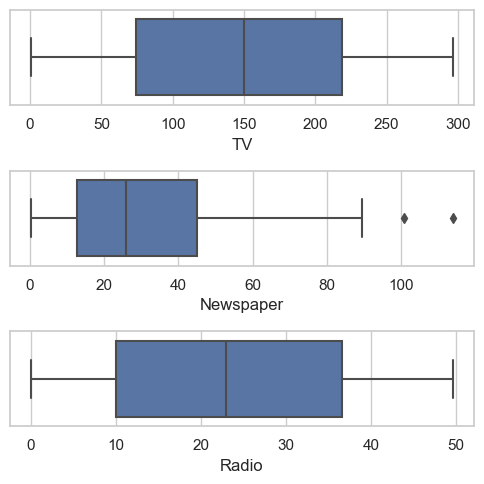

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

There are no outliers in TV and Radio marketing expenditure.  There are 2 outliers in Newspaper expenditures. 


#### Exploratory data analysis

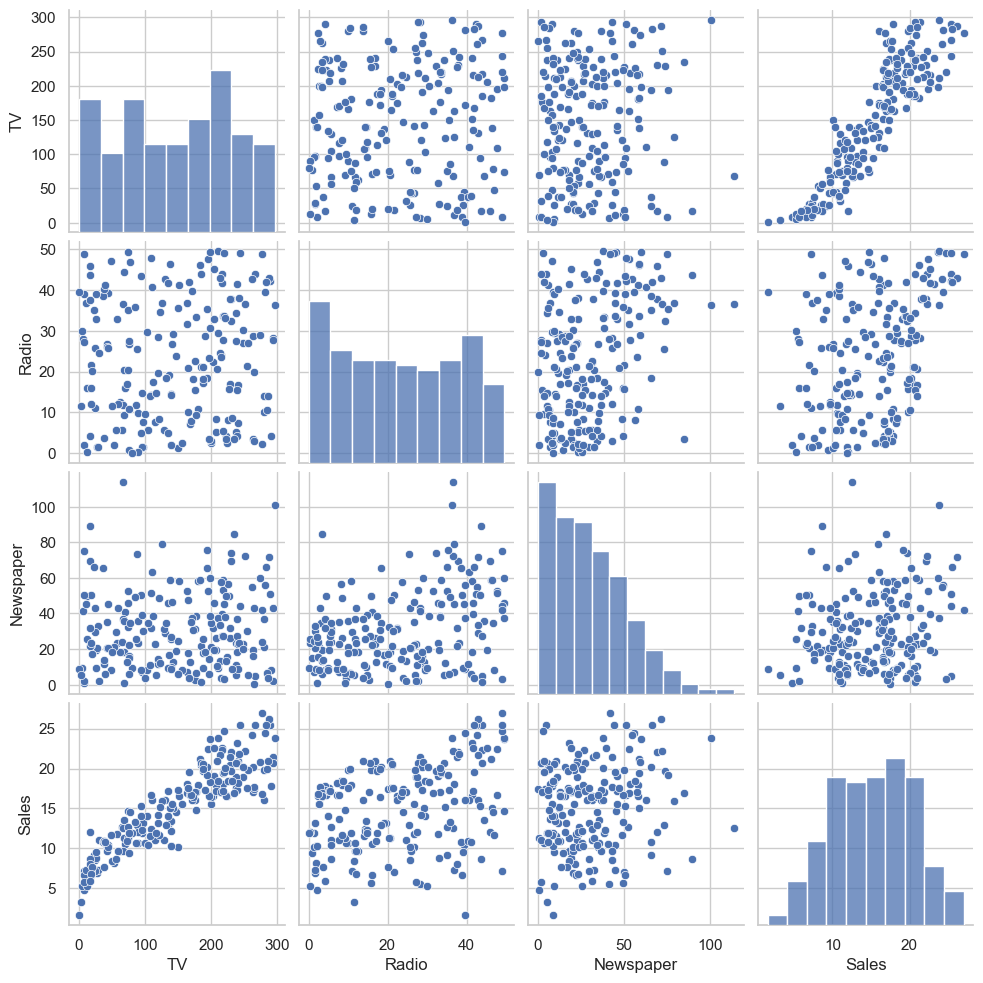

In [22]:
sns.pairplot(advertising, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.show()


Observations: 
From the above graph we can see the clear relationship between TV  advertisement and sales. We cant find any such relationship between Radio and Newspaper with sales. 

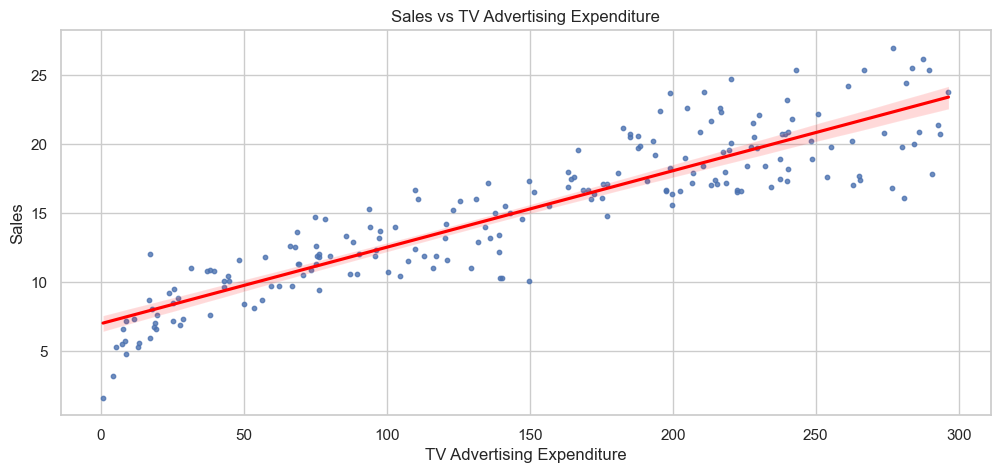

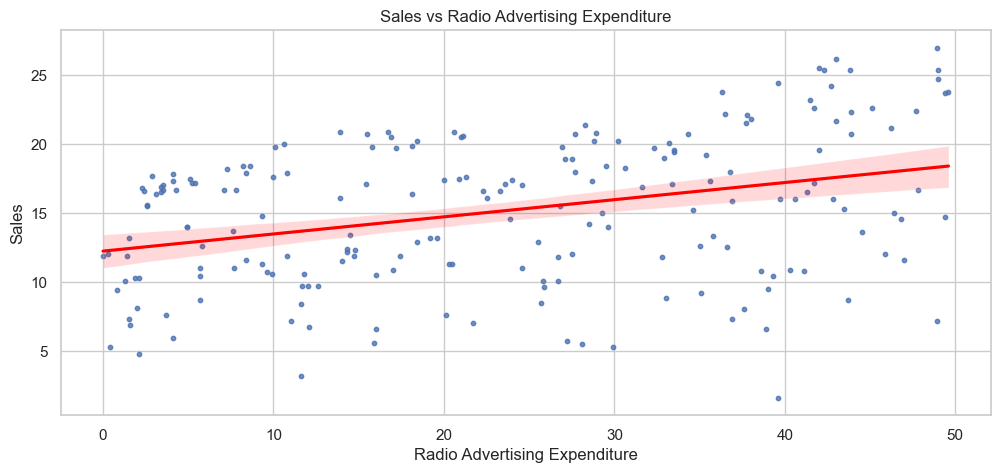

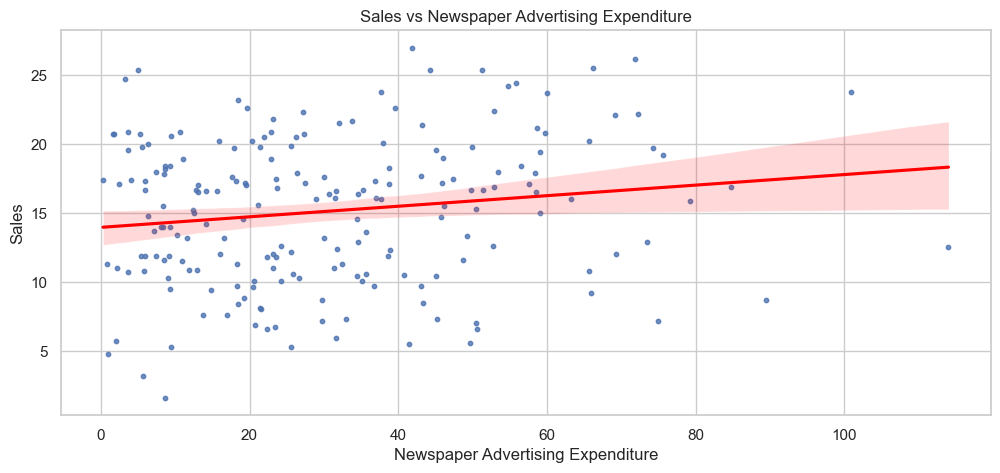

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Sales vs TV with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='TV', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Radio with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Radio', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Radio Advertising Expenditure')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Newspaper with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Newspaper', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Newspaper Advertising Expenditure')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.show()


Observations: 
Again, clearly we can see the clear relationship between TV advertisement and sales. 

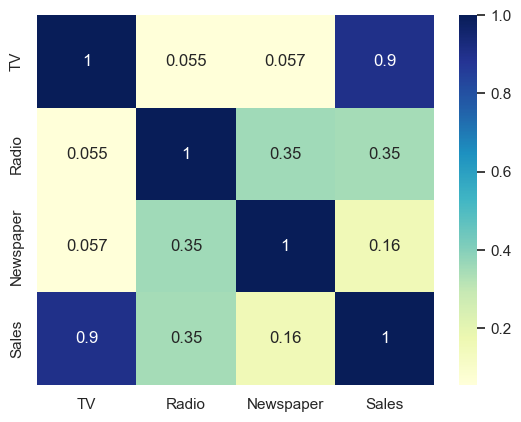

In [26]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As expected we have can clearly see the high correlation between sales and TV advertising. 

## 4. Model Building 

Simple linear regression is a statistical method for modeling the relationship between two variables. It is the simplest form of linear regression, and it is used to model the relationship between a single independent variable (x) and a single dependent variable (y).

The mathematical formula for simple linear regression is as follows:

y = a + bx + ε
where:

- y is the dependent variable
- x is the independent variable
- a is the intercept
- b is the slope
- ε is the error term

The intercept (a) represents the value of y when x is zero. The slope (b) represents the change in y for every unit change in x. The error term (ε) represents the unexplained variation in y that is not captured by the model.


We are going to use TV advertisement as input (independent variable) and sales as output(dependent) variable.  


### Split the data into Features and target

In [28]:
X = advertising['TV']
y = advertising['Sales']

###### Training and Testing Data Split
The next step is to partition your dataset into training and testing subsets. To achieve this, you'll utilize the train_test_split function from the sklearn.model_selection library. Typically, it's recommended to allocate 70% of the data to the training dataset and reserve the remaining 30% for the testing dataset as a common practice



In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

###  Building a Linear Model

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the feature (independent variable) and the target (dependent variable)
X = advertising['TV'].values.reshape(-1, 1)
y = advertising['Sales']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 5.7329278499817535
R-squared (R2) Score: 0.7895382693709685


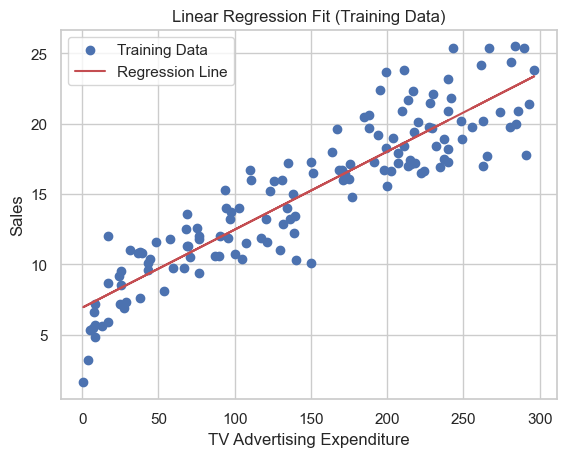

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Predict y values for the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a scatter plot for the training data
plt.scatter(X_train, y_train, label='Training Data')

# Plot the regression line for the training data
plt.plot(X_train, y_pred_train, 'r', label='Regression Line')

# Labeling the axes and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit (Training Data)')
plt.legend()
plt.show()


In [69]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()



# Get the summary of the regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     634.9
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.75e-53
Time:                        11:03:59   Log-Likelihood:                -311.32
No. Observations:                 140   AIC:                             626.6
Df Residuals:                     138   BIC:                             632.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9132      0.377     18.351      0.0

From the above regression summary, here are some key statistics to focus on:

1. **Coefficients and Significance (P-values):**
   - `const`: The intercept (constant) coefficient is approximately 6.9132.
   - `x1`: The coefficient for the predictor variable (e.g., 'TV' advertising expenditure) is approximately 0.0555.
   - P-values (P>|t|): The p-values for both coefficients are very close to 0 (0.000), indicating that they are statistically significant.

2. **R-squared (R²):**
   - R-squared (R²) is a measure of how well the independent variable(s) explain the variance in the dependent variable.
   - In this case, R-squared (R²) is approximately 0.821, which means that about 82.1% of the variance in 'Sales' can be explained by the 'TV' advertising expenditure.

3. **F Statistic and its Significance:**
   - The F-statistic tests the overall significance of the model.
   - F-statistic: 634.9
   - Prob (F-statistic): 1.75e-53 (very close to 0)
   - The low p-value (close to 0) for the F-statistic indicates that the overall model is statistically significant, meaning that at least one independent variable is related to the dependent variable.

4. **Additional Statistics:**
   - The summary includes other statistics like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), Durbin-Watson statistic, and more, which can provide insights into the quality and assumptions of the regression model.

In summary, the provided linear regression model is statistically significant, and both the intercept and the coefficient for the 'TV' advertising expenditure are significant in predicting 'Sales.' The R-squared value of 0.821 suggests that the model explains a substantial portion of the variance in 'Sales,' and the F-statistic further supports the overall significance of the model.

--

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

######  Sales = 6.948 + 0.054 × TV

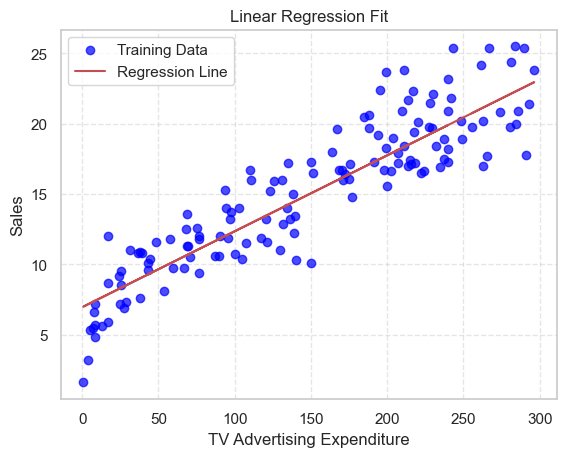

In [78]:
import matplotlib.pyplot as plt

# Create a scatter plot for the training data
plt.scatter(X_train[:, 1], y_train, label='Training Data', color='blue', marker='o', alpha=0.7)

# Calculate the predictions using the equation
y_pred_train = 6.948 + 0.054 * X_train[:, 1]

# Plot the regression line
plt.plot(X_train[:, 1], y_pred_train, 'r', label='Regression Line')

# Add labels and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')

# Display the legend
plt.legend()

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Customize plot style
plt.style.use('seaborn')

# Show the plot
plt.show()


##  5. Model Performance Evaluation  : 

To evaluate the performance of a linear regression model, there are several common metrics and techniques you can use. Here are some of the key methods to assess the performance of the model:

### Model Performance Evaluation on Training dataset

#### 1.  Mean Squared Error (MSE):

Calculate the mean squared error between the actual and predicted values. Lower MSE indicates better performance.

In [100]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

5.054703943714285


#### 2.  R-squared (R²) Score: 
Determine the coefficient of determination, which measures the proportion of the variance in the dependent variable explained by the model. A higher R² score is better.

In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print(r2)

0.8195336685530539


#### 3. Residual Analysis: 
Examine the distribution of the residuals (differences between actual and predicted values). A random and normally distributed set of residuals is a good sign.

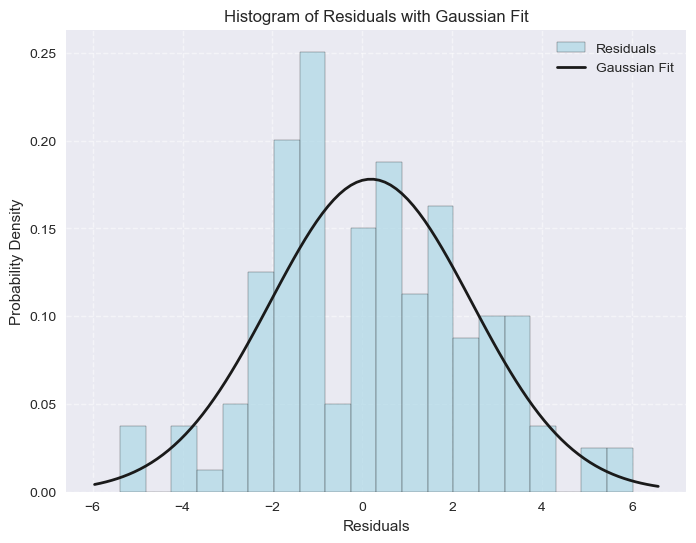

In [102]:
from scipy.stats import norm

# Calculate the residuals
residuals = y_train - y_pred_train

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


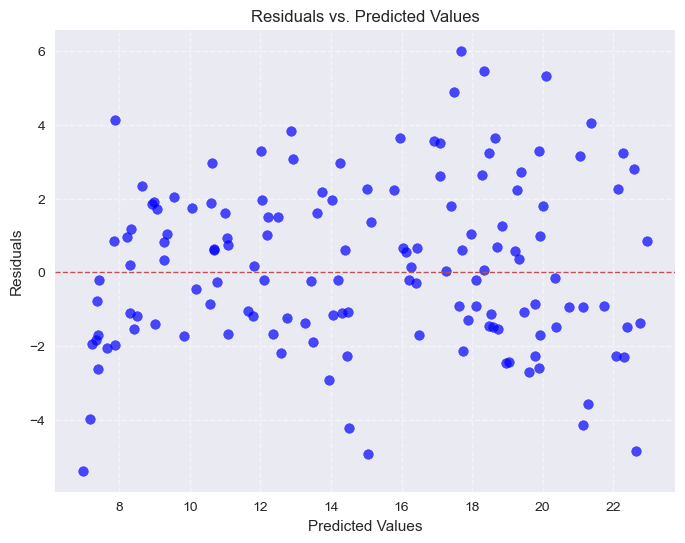

In [103]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Model Performance Evaluation on Testing dataset

After assessing the model on the training data, evaluate its performance on a test dataset. This gives you an indication of how well the model will perform in the real world.

#### 1.  Mean Squared Error (MSE) :

In [93]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)

5.7329278499817535


#### 2.  R-squared (R²)  Score: 

In [94]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.7895382693709685


#### 3. Residual Analysis: 

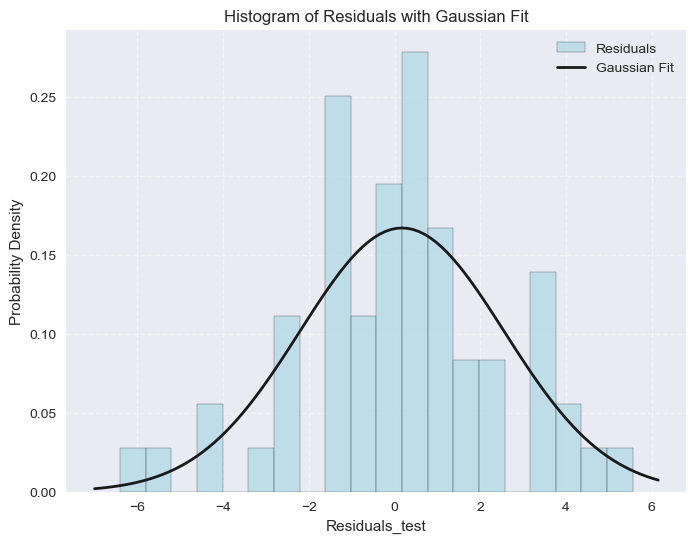

In [99]:
from scipy.stats import norm

# Calculate the residuals
residuals_test = y_test - y_pred_test

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_testt, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals_test)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals_test')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


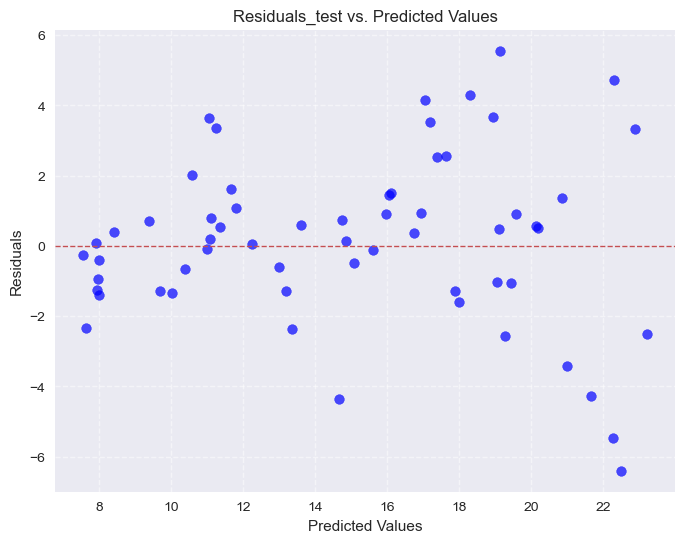

In [98]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals_test vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The model appears to be performing well. The R² values for both training and test data are relatively high, indicating that the model explains a significant portion of the variance in the target variable. The MSE values, while not extremely low, suggest that the model's predictions are reasonably close to the actual values on both the training and test data.

## Conclusion :

Our exploration clearly shows the linear relationship between TV advertisements and sales. They should give more ads on TV for higher sales. 


As we have not used all the available machine learning regression algorithms and related techniques, there are strong possibilities to get better results. I would also recommend to explore deep learning to see if we can get better results